In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt 
import random

In [2]:
print(f"tensorflow: {tf.__version__}")

tensorflow: 2.12.0


# 1. Load data

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [4]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [5]:
X_train.dtype, y_train.dtype

(dtype('uint8'), dtype('uint8'))

In [6]:
y_train[0]

9

In [7]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']
class_nums = len(class_names)

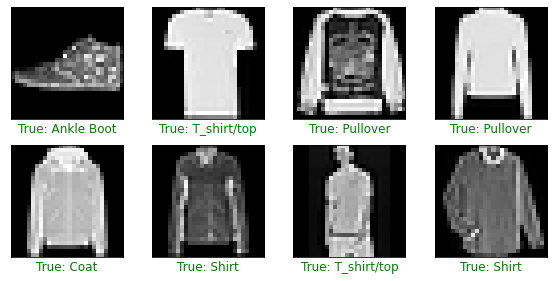

In [36]:
from typing import Optional
def plot_data(x_data: np.ndarray, y_data: np.ndarray, y_proba: Optional[np.ndarray]=None) -> None:
    nrows, ncols = 2, 4
    fig, axes = plt.subplots(nrows, ncols, figsize=(8,4))
    
    for idx in range(ncols*nrows):
        ax = axes[idx//ncols, idx%ncols]
        img_idx = random.randint(0, len(x_data))
        ax.imshow(x_data[img_idx], cmap='gray')
        ax.set(xticks=[], yticks=[])
        color = 'green'
        true_label_str = f"True: {class_names[y_data[img_idx]]}"
        
        if y_proba is not None:
            predicted_idx = np.argmax(y_proba[img_idx])
            prediction_label = class_names[predicted_idx]
            color = 'red' if predicted_idx != y_data[img_idx] else color
            prediction_label_str = f'\nPredicted: {prediction_label}'
        
        img_title = true_label_str if y_proba is None else true_label_str + prediction_label_str
        ax.set_xlabel(img_title, color=color, fontsize=12)
    
    plt.tight_layout()
    plt.show()
        
plot_data(X_train, y_train)

# 2. Image Pre-processing

- Reshaping it into the shape the model expects and scaling it so that all values are in the `[0, 1]` interval
- Transform from `uint8` to `float32`
- 

In [9]:
# Convert to float32 & scale images to the [0, 1] range for training
X_train = X_train.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255

In [10]:
X_train.dtype, X_test.dtype

(dtype('float32'), dtype('float32'))

In [11]:
X_train = np.expand_dims(X_train, axis = -1)
X_test = np.expand_dims(X_test, axis = -1)

In [12]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [13]:
y_train_label = keras.utils.to_categorical(y_train, class_nums)
y_test_label = keras.utils.to_categorical(y_test, class_nums)

In [14]:
y_train[0], y_train_label[0]

(9, array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32))

 # 3. Network Architecture

In [15]:
input_shape = (28,28,1)

In [16]:
model = keras.models.Sequential([
    layers.Flatten(input_shape=input_shape),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(class_nums, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics='accuracy')

In [18]:
epochs = 10
batch_size = 128
history = model.fit(X_train, y_train_label, epochs=epochs, batch_size=batch_size, validation_split=0.1)

Epoch 1/10
422/422 [==============================] - 4s 9ms/step - loss: 0.5594 - accuracy: 0.7956 - val_loss: 0.4164 - val_accuracy: 0.8452
Epoch 2/10
422/422 [==============================] - 4s 9ms/step - loss: 0.3844 - accuracy: 0.8589 - val_loss: 0.3994 - val_accuracy: 0.8530
Epoch 3/10
422/422 [==============================] - 4s 9ms/step - loss: 0.3369 - accuracy: 0.8739 - val_loss: 0.3629 - val_accuracy: 0.8695
Epoch 4/10
422/422 [==============================] - 4s 9ms/step - loss: 0.3076 - accuracy: 0.8837 - val_loss: 0.3543 - val_accuracy: 0.8747
Epoch 5/10
422/422 [==============================] - 4s 10ms/step - loss: 0.2909 - accuracy: 0.8912 - val_loss: 0.3528 - val_accuracy: 0.8690
Epoch 6/10
422/422 [==============================] - 5s 11ms/step - loss: 0.2740 - accuracy: 0.8963 - val_loss: 0.3458 - val_accuracy: 0.8768
Epoch 7/10
422/422 [==============================] - 4s 10ms/step - loss: 0.2594 - accuracy: 0.9019 - val_loss: 0.3345 - val_accuracy: 0.8842
Epo

In [19]:
history_dict = history.history

In [20]:
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [21]:
train_loss, val_loss = history_dict['loss'], history_dict['val_loss']
train_acc, val_acc = history_dict['accuracy'], history_dict['val_accuracy']

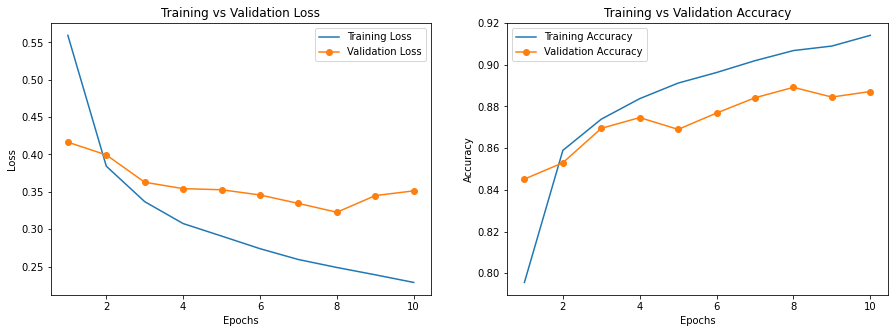

In [25]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
epoch_runs = [i+1 for i in range(epochs)]

ax1.plot(epoch_runs, train_loss, label='Training Loss')
ax1.plot(epoch_runs, val_loss, label='Validation Loss', marker='o')
ax1.set(title='Training vs Validation Loss', xlabel='Epochs', ylabel='Loss')
ax1.legend()

ax2.plot(epoch_runs, train_acc, label='Training Accuracy')
ax2.plot(epoch_runs, val_acc, label='Validation Accuracy', marker='o')
ax2.set(title='Training vs Validation Accuracy', xlabel='Epochs', ylabel='Accuracy')
ax2.legend()

# 4. Model Evaluation

In [26]:
score = model.evaluate(X_test, y_test_label)

313/313 [==============================] - 1s 3ms/step - loss: 0.3649 - accuracy: 0.8783


In [27]:
print(f'Test Loss: {score[0]:.4f}')
print(f'Test Accuracy: {score[1]:.4f}')

Test Loss: 0.3649
Test Accuracy: 0.8783


# 5. Prediction

In [28]:
X_sample = X_test[:3]
y_proba = model.predict(X_sample)

1/1 [==============================] - 0s 81ms/step


In [30]:
y_proba.round(3)

array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        1.   ],
       [0.   , 0.   , 0.999, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ]], dtype=float32)

In [31]:
predictions = np.argmax(y_proba, axis=1)

In [34]:
[class_names[predict] for predict in predictions]

['Ankle Boot', 'Pullover', 'Trouser']

In [37]:
y_proba = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


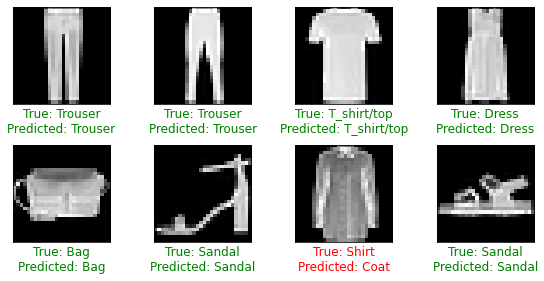

In [41]:
plot_data(X_test, y_test, y_proba)